In [23]:
import pandas as pd
from os.path import join
import numpy as np
from datetime import datetime
from datetime import timedelta
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import os
import ntpath
from glob import glob

In [25]:
def convert_to_datetime(arr):
    fmt = '%H:%M'
    offset = timedelta(hours=11,minutes=36)
    arr_str = []
    for t in arr:
        dt = datetime.fromtimestamp(t/1000000.)
        dt = dt-offset
        arr_str.append(dt.strftime(fmt))
    return arr_str

In [26]:
def clear_figure():
    plt.clf()
    figure(figsize=(25,12))
    font = {'size'   : 30}
    plt.rc('font', **font)
    plt.rcParams["axes.linewidth"]  = 2.5


/data/juma/data/ids18/CSVs/WS/Friday-23-02-2018/MemoryUsage_FI_1_Flow.csv 10916
/data/juma/data/ids18/CSVs/WS/Thursday-01-03-2018/MemoryUsage_FI_1_Flow.csv 12509
/data/juma/data/ids18/CSVs/WS/Wednesday-21-02-2018/MemoryUsage_FI_1_Flow.csv 12164
/data/juma/data/ids18/CSVs/WS/Wednesday-28-02-2018/MemoryUsage_FI_1_Flow.csv 14411
/data/juma/data/ids18/CSVs/WS/Friday-16-02-2018/MemoryUsage_FI_1_Flow.csv 19316
/data/juma/data/ids18/CSVs/WS/Thursday-22-02-2018/MemoryUsage_FI_1_Flow.csv 21076
/data/juma/data/ids18/CSVs/WS/Tuesday-20-02-2018/MemoryUsage_FI_1_Flow.csv 12102
/data/juma/data/ids18/CSVs/WS/Thursday-15-02-2018/MemoryUsage_FI_1_Flow.csv 11810
/data/juma/data/ids18/CSVs/WS/Friday-16-02-2018-bef/MemoryUsage_FI_1_Flow.csv 9325
/data/juma/data/ids18/CSVs/WS/Wednesday-14-02-2018/MemoryUsage_FI_1_Flow.csv 10301


<Figure size 432x288 with 0 Axes>

<Figure size 1800x864 with 0 Axes>

<Figure size 1800x864 with 0 Axes>

<Figure size 1800x864 with 0 Axes>

<Figure size 1800x864 with 0 Axes>

<Figure size 1800x864 with 0 Axes>

<Figure size 1800x864 with 0 Axes>

<Figure size 1800x864 with 0 Axes>

<Figure size 1800x864 with 0 Axes>

<Figure size 1800x864 with 0 Axes>

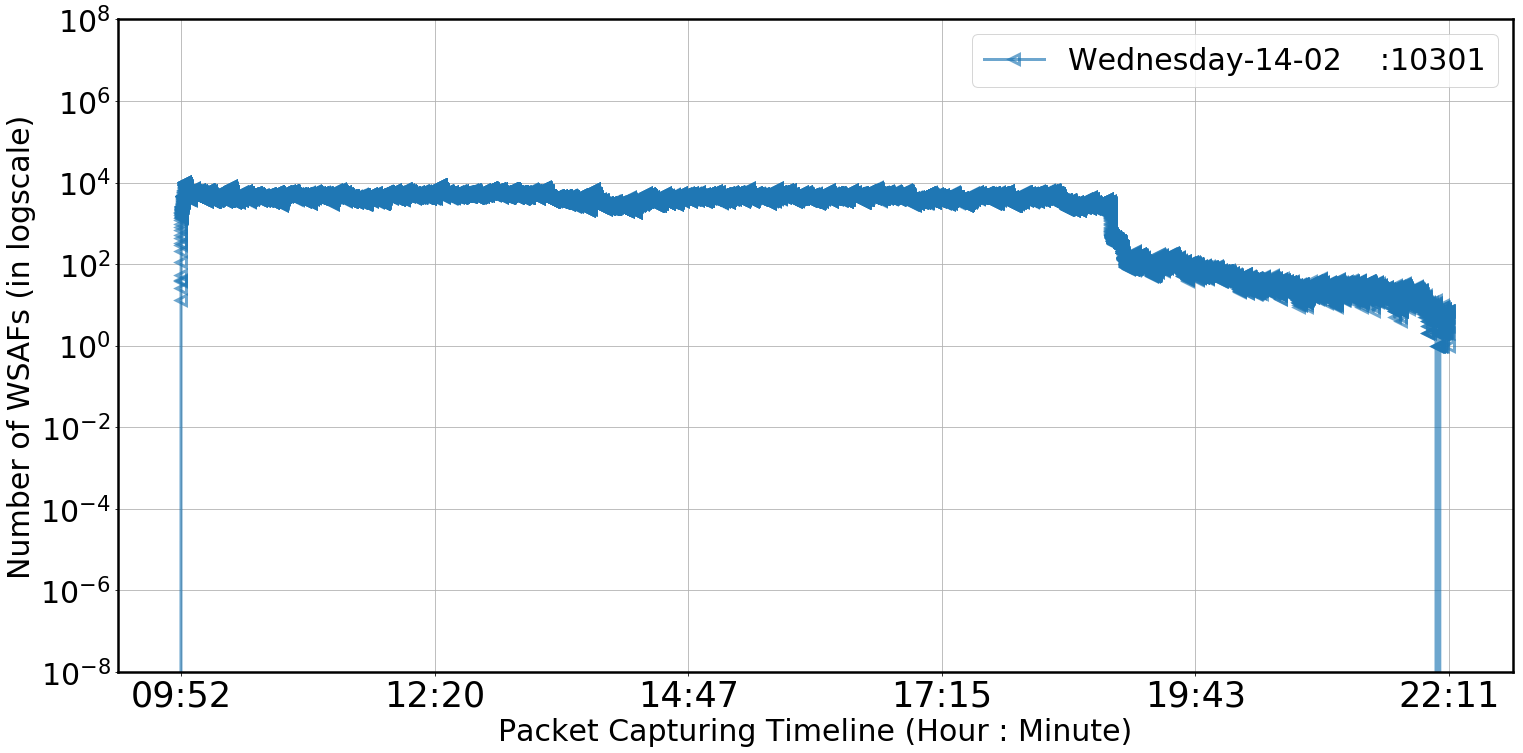

In [27]:
import ntpath
dataroot = '/data/juma/data/ids18/CSVs/WS'
filename = 'MemoryUsage_FI_1_Flow.csv'

markers = ['>','*','<','o','^','d','D','>','*','<','o','^','d','D']
wsafs = []
for i, fn in enumerate(glob(join(dataroot,'*',filename))):
    clear_figure()
    day_dir = ntpath.basename(ntpath.split(fn)[0])
    df = pd.read_csv(fn)
    df = df.sort_values('Timestamp')
    
    #put time labels on x-axis
    begin_time = df['Timestamp'].min()
    end_time = df['Timestamp'].max()  
    time_labels = np.linspace(begin_time,end_time,6)
    lindices = convert_to_datetime(time_labels)
    plt.xticks(time_labels,lindices,fontsize=35)

    #with open(join(dataroot,d,'max_wsaf_count.txt'),'w') as f:
    with open(fn.replace(filename,'max_wsaf_count.txt'),'w') as f:
        f.write('{}'.format(df['#WSAF'].max()))
    print(fn,df['#WSAF'].max())
    

    legend_name = '{:19}'.format(day_dir.replace('-2018',''))+':{}'.format(df['#WSAF'].max())
    plt.plot(df['Timestamp'],df['#WSAF'],label=legend_name,linewidth=3,marker=markers[i],markersize=10,
             markeredgewidth=3,markerfacecolor='none',alpha=.65)

    
    plt.yscale('log')
    plt.grid()
    plt.ylim(10**(-8),10**8)
    plt.legend(ncol=2)

    plt.ylabel('Number of WSAFs (in logscale)')
    plt.xlabel('Packet Capturing Timeline (Hour : Minute)')

    plt.savefig(join(dataroot,'{}_wsaf.png'.format(day_dir)))
    #plt.show()